## 01 - EDA

Análisis de empleado.

In [24]:
import pandas as pd

pd.set_option('display.max_columns', None)

import re

import pylab as plt
import seaborn as sns
%matplotlib inline

In [25]:
data=pd.read_csv('../data/HR_dataset.csv')

data.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [26]:
data.columns=[re.sub(r'(?<!^)(?=[A-Z])', '_', e).lower().replace('/', '').replace(' ', '') for e in data.columns]

data.head()

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,dateof_hire,dateof_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_name       301 non-null    object 
 1   employee_number     301 non-null    float64
 2   state               301 non-null    object 
 3   zip                 301 non-null    float64
 4   d_o_b               301 non-null    object 
 5   age                 301 non-null    float64
 6   sex                 301 non-null    object 
 7   marital_desc        301 non-null    object 
 8   citizen_desc        301 non-null    object 
 9   hispanic_latino     301 non-null    object 
 10  race_desc           301 non-null    object 
 11  dateof_hire         301 non-null    object 
 12  dateof_termination  103 non-null    object 
 13  reason_for_term     301 non-null    object 
 14  employment_status   301 non-null    object 
 15  department          301 non-null    object 
 16  position

In [28]:
data.isna().sum()

employee_name           1
employee_number         1
state                   1
zip                     1
d_o_b                   1
age                     1
sex                     1
marital_desc            1
citizen_desc            1
hispanic_latino         1
race_desc               1
dateof_hire             1
dateof_termination    199
reason_for_term         1
employment_status       1
department              1
position                1
pay_rate                1
manager_name            1
employee_source         1
performance_score       1
dtype: int64

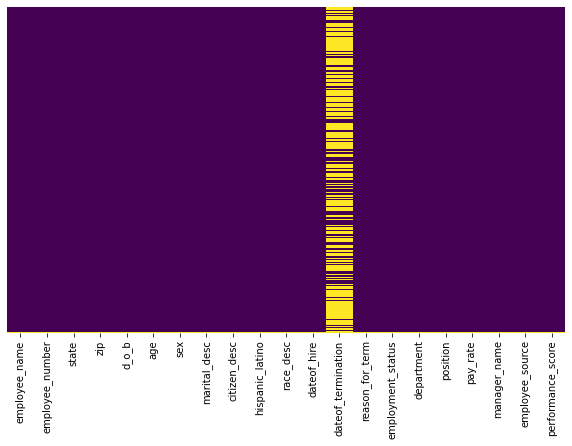

In [29]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))

sns.heatmap(data.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [30]:
data.dropna(how='all', axis=0, inplace=True)

In [31]:
data.shape

(301, 21)

In [32]:
data.sex.unique()

array(['Female', 'Male', 'male'], dtype=object)

In [33]:
data.sex.replace('male','Male', inplace=True)

data.sex.unique()

array(['Female', 'Male'], dtype=object)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_name       301 non-null    object 
 1   employee_number     301 non-null    float64
 2   state               301 non-null    object 
 3   zip                 301 non-null    float64
 4   d_o_b               301 non-null    object 
 5   age                 301 non-null    float64
 6   sex                 301 non-null    object 
 7   marital_desc        301 non-null    object 
 8   citizen_desc        301 non-null    object 
 9   hispanic_latino     301 non-null    object 
 10  race_desc           301 non-null    object 
 11  dateof_hire         301 non-null    object 
 12  dateof_termination  103 non-null    object 
 13  reason_for_term     301 non-null    object 
 14  employment_status   301 non-null    object 
 15  department          301 non-null    object 
 16  position

In [35]:
data.fillna(0, inplace=True)

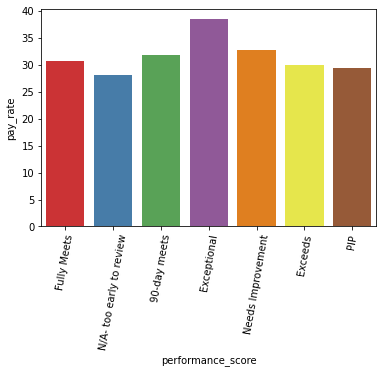

In [36]:
chart=sns.barplot(x = 'performance_score', y = 'pay_rate', data=data, palette='Set1', ci=None)
chart.set_xticklabels(chart.get_xticklabels(),rotation=80);

In [37]:
data.sort_values('pay_rate').reset_index(drop=True)

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,dateof_hire,dateof_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Stanford,Barbara M",1.111030e+09,MA,2050.0,8/25/82,35.0,Female,Divorced,US Citizen,No,Two or more races,1/10/11,0,N/A - still employed,Active,Production,Production Technician I,14.0,Kissy Sullivan,Word of Mouth,Fully Meets
1,"Sutwell, Barbara",1.407069e+09,MA,2718.0,8/15/68,49.0,Female,Single,Eligible NonCitizen,No,Asian,5/14/12,0,N/A - still employed,Active,Production,Production Technician I,14.0,Elijiah Gray,Glassdoor,Fully Meets
2,"Knapp, Bradley J",1.304056e+09,MA,1721.0,11/10/77,40.0,Male,Single,US Citizen,No,Black or African American,2/17/14,0,N/A - still employed,Active,Production,Production Technician I,14.0,Ketsia Liebig,On-campus Recruiting,Fully Meets
3,"Meads, Elizabeth",1.409070e+09,MA,1760.0,5/30/68,49.0,Female,Single,US Citizen,No,Black or African American,4/2/12,11/11/15,Another position,Voluntarily Terminated,Production,Production Technician I,14.0,Kelley Spirea,Diversity Job Fair,Fully Meets
4,"Gross, Paula",1.103025e+09,MA,2176.0,5/21/83,34.0,Female,Divorced,US Citizen,No,White,2/21/11,1/11/14,more money,Voluntarily Terminated,Production,Production Technician I,14.0,Kelley Spirea,Monster.com,Fully Meets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Monroe, Peter",1.011023e+09,MA,2134.0,10/5/86,31.0,Male,Married,Eligible NonCitizen,Yes,Hispanic,2/15/12,0,N/A - still employed,Active,IT/IS,IT Manager - Infra,63.0,Jennifer Zamora,Diversity Job Fair,Needs Improvement
297,"Dougall, Eric",1.101024e+09,MA,1886.0,7/9/70,47.0,Male,Single,US Citizen,No,White,1/5/14,0,N/A - still employed,Active,IT/IS,IT Manager - Support,64.0,Jennifer Zamora,Professional Society,Exceeds
298,"Foss, Jason",1.192991e+09,MA,1460.0,7/5/80,37.0,Male,Single,US Citizen,No,Black or African American,4/15/11,0,N/A - still employed,Active,IT/IS,IT Director,65.0,Jennifer Zamora,Professional Society,Exceptional
299,"Zamora, Jennifer",1.112031e+09,MA,2067.0,8/30/79,38.0,Female,Single,US Citizen,No,White,4/10/10,0,N/A - still employed,Active,IT/IS,CIO,65.0,Janet King,Employee Referral,Exceptional
